In [1]:
import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn

In [2]:
from IPython.display import display_markdown

In [3]:
def markdown_body(txt):
    if type(txt)==str:
        return "> " + txt
    elif type(txt)==pd.core.series.Series:
        out = '| Index | Value |\n| :----- | -----: |\n'
        for i in range(0,txt.shape[0]):
            out += f"| {txt.index[i]} | "
            if type(txt.iloc[i])==float or type(txt.iloc[i])==int or type(txt.iloc[i])==np.float64:
                out += f"{txt.iloc[i]:0.2f}"
            else:
                out += f"{txt.iloc[i]}"
            out += ' |\n'
        return out
    else:
        print(type(txt))
        return "> " + txt

In [4]:
def as_markdown(head='', body='Some body text'):
    if head != '':
        display_markdown(f"##### {head}\n\n{markdown_body(body)}\n", raw=True)
    else:
        display_markdown(f"{markdown_body(body)}\n", raw=True)

In [5]:
msoa_atlas = pd.read_excel(
    'https://data.london.gov.uk/download/msoa-atlas/39fdd8eb-e977-4d32-85a4-f65b92f29dcb/msoa-data.xls', 
    sheet_name='iadatasheet1', # Which sheet is the data in?
    header=[0,1,2]) 

In [6]:
msoa_atlas.head(3)

Unnamed: 0_level_0        Unnamed: 1_level_0 Age Structure (2011 Census)  \
  Unnamed: 0_level_1        Unnamed: 1_level_1                    All Ages   
           MSOA Code                 MSOA Name          Unnamed: 2_level_2   
0          E02000001        City of London 001                      7375.0   
1          E02000002  Barking and Dagenham 001                      6775.0   
2          E02000003  Barking and Dagenham 002                     10045.0   

                                                                               \
                0-15              16-29              30-44              45-64   
  Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
0              620.0             1665.0             2045.0             2010.0   
1             1751.0             1277.0             1388.0             1258.0   
2             2247.0             1959.0             2300.0             2259.0   

                                        Mid-year Estimate totals  ...  \
                 65+        Working-age                 All Ages  ...   
  Unnamed: 7_level_2 Unnamed: 8_level_2                     2002  ...   
0             1035.0             5720.0                   7280.0  ...   
1             1101.0             3923.0                   6333.0  ...   
2             1280.0             6518.0                   9236.0  ...   

  Road Casualties                                                           \
             2010             2011                            2012           
           Slight 2010 Total Fatal Serious Slight 2011 Total Fatal Serious   
0           334.0      374.0   0.0    46.0  359.0      405.0   2.0    51.0   
1            18.0       18.0   0.0     2.0   16.0       18.0   0.0     1.0   
2            34.0       37.0   1.0     4.0   40.0       45.0   0.0     3.0   

                     
                     
  Slight 2012 Total  
0  361.0      414.0  
1   15.0       16.0  
2   47.0       50.0  

[3 rows x 207 columns]

In [7]:
print(f'shape of the MSOA Atlas data frame is:{msoa_atlas.shape[0]} x {msoa_atlas.shape[1]}')

shape of the MSOA Atlas data frame is:984 x 207


In [8]:
print(msoa_atlas.columns.get_level_values(0))

Index(['Unnamed: 0_level_0', 'Unnamed: 1_level_0',
       'Age Structure (2011 Census)', 'Age Structure (2011 Census)',
       'Age Structure (2011 Census)', 'Age Structure (2011 Census)',
       'Age Structure (2011 Census)', 'Age Structure (2011 Census)',
       'Age Structure (2011 Census)', 'Mid-year Estimate totals',
       ...
       'Road Casualties', 'Road Casualties', 'Road Casualties',
       'Road Casualties', 'Road Casualties', 'Road Casualties',
       'Road Casualties', 'Road Casualties', 'Road Casualties',
       'Road Casualties'],
      dtype='object', length=207)


In [9]:
msoa_atlas[['Mid-year Estimate totals']].head(3)

Mid-year Estimate totals                                                  \
                  All Ages                                                   
                      2002    2003    2004    2005    2006    2007    2008   
0                   7280.0  7115.0  7118.0  7131.0  7254.0  7607.0  7429.0   
1                   6333.0  6312.0  6329.0  6341.0  6330.0  6323.0  6369.0   
2                   9236.0  9252.0  9155.0  9072.0  9144.0  9227.0  9564.0   

                                      
                                      
     2009     2010     2011     2012  
0  7472.0   7338.0   7412.0   7604.0  
1  6570.0   6636.0   6783.0   6853.0  
2  9914.0  10042.0  10088.0  10218.0

In [10]:
to_drop = ['Mid-year Estimate totals','Mid-year Estimates 2012, by age','Religion (2011)',
           'Land Area','Lone Parents (2011 Census)','Central Heating (2011 Census)','Health (2011 Census)',
           'Low Birth Weight Births (2007-2011)','Obesity','Incidence of Cancer','Life Expectancy',
           'Road Casualties']

In [11]:
msoa_atlas.drop(to_drop,axis=1,level=0,inplace=True)
print(f'Shape of the MSOA Atlas data frame is now:{msoa_atlas.shape[0]} x {msoa_atlas.shape[1]}')

Shape of the MSOA Atlas data frame is now:984 x 111


In [12]:
print(msoa_atlas.columns.levels[0])

Index(['Adults in Employment (2011 Census)', 'Age Structure (2011 Census)',
       'Car or van availability (2011 Census)',
       'Central Heating (2011 Census)', 'Country of Birth (2011)',
       'Dwelling type (2011)', 'Economic Activity (2011 Census)',
       'Ethnic Group (2011 Census)', 'Health (2011 Census)', 'House Prices',
       'Household Composition (2011)', 'Household Income Estimates (2011/12)',
       'Household Language (2011)', 'Households (2011)', 'Incidence of Cancer',
       'Income Deprivation (2010)', 'Land Area', 'Life Expectancy',
       'Lone Parents (2011 Census)', 'Low Birth Weight Births (2007-2011)',
       'Mid-year Estimate totals', 'Mid-year Estimates 2012, by age',
       'Obesity', 'Population Density', 'Qualifications (2011 Census)',
       'Religion (2011)', 'Road Casualties', 'Tenure (2011)',
       'Unnamed: 0_level_0', 'Unnamed: 1_level_0'],
      dtype='object')


In [13]:
print(msoa_atlas.columns.get_level_values(0))

Index(['Unnamed: 0_level_0', 'Unnamed: 1_level_0',
       'Age Structure (2011 Census)', 'Age Structure (2011 Census)',
       'Age Structure (2011 Census)', 'Age Structure (2011 Census)',
       'Age Structure (2011 Census)', 'Age Structure (2011 Census)',
       'Age Structure (2011 Census)', 'Households (2011)',
       ...
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)',
       'Car or van availability (2011 Census)'],
      dtype='object', length=111)


In [14]:
to_drop = [x for x in msoa_atlas.columns.get_level_values(1) if (
       x.endswith("(%)") or x.startswith("%")or x.endswith("Percentages")or x.endswith("%"))]
print(to_drop)

['Percentages', 'Percentages', 'Percentages', 'Percentages', 'Percentages', 'White (%)', 'Mixed/multiple ethnic groups (%)', 'Asian/Asian British (%)', 'Black/African/Caribbean/Black British (%)', 'Other ethnic group (%)', 'BAME (%)', 'United Kingdom (%)', 'Not United Kingdom (%)', '% of people aged 16 and over in household have English as a main language', '% of households where no people in household have English as a main language', 'Owned: Owned outright (%)', 'Owned: Owned with a mortgage or loan (%)', 'Social rented (%)', 'Private rented (%)', 'Household spaces with at least one usual resident (%)', 'Household spaces with no usual residents (%)', 'Whole house or bungalow: Detached (%)', 'Whole house or bungalow: Semi-detached (%)', 'Whole house or bungalow: Terraced (including end-terrace) (%)', 'Flat, maisonette or apartment (%)', 'Economically active %', 'Economically inactive %', '% of households with no adults in employment: With dependent children', '% living in income depri

In [15]:
msoa_atlas.drop(to_drop,axis=1,level=1,inplace=True)

In [16]:
print(f"Shape of the MSOA Atlas data frame is now: {msoa_atlas.shape[0]} x {msoa_atlas.shape[1]}")

Shape of the MSOA Atlas data frame is now: 984 x 76


In [17]:
msoa_atlas.columns.values[:3]

array([('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'MSOA Code'),
       ('Unnamed: 1_level_0', 'Unnamed: 1_level_1', 'MSOA Name'),
       ('Age Structure (2011 Census)', 'All Ages', 'Unnamed: 2_level_2')],
      dtype=object)

In [18]:
new_cols = []
for c in msoa_atlas.columns.values:
    
    #print(f"Column label: {c}")
    l1 = f"{c[0]}"
    l2 = f"{c[1]}"
    l3 = f"{c[2]}"
    
    # The new column label
    clabel = ''
    
    # Assemble new label from the levels
    if not l1.startswith("Unnamed"):
        l1 = l1.replace(" (2011 Census)",'').replace(" (2011)",'').replace("Household ",'').replace("House Prices",'').replace("Car or van availability",'Vehicles').replace(' (2011/12)','')
        l1 = l1.replace('Age Structure','Age').replace("Ethnic Group",'').replace('Dwelling type','').replace('Income Estimates','')
        clabel += l1
    if not l2.startswith("Unnamed"):
        l2 = l2.replace("Numbers",'').replace(" House Price (£)",'').replace("Highest level of qualification: ",'').replace("Annual Household Income (£)",'hh Income').replace('Whole house or bungalow: ','').replace(' qualifications','')
        l2 = l2.replace('At least one person aged 16 and over in household has English as a main language',"1+ English as a main language").replace("No people in household have English as a main language","None have English as main language")
        clabel += (' - ' if clabel != '' else '') + l2
    if not l3.startswith("Unnamed"):
        clabel += (' - ' if clabel != '' else '') + l3
    
    # Replace other commonly-occuring verbiage that inflates column name width
    clabel = clabel.replace(' -  - ',' - ').replace(" household",' hh').replace('Owned: ','')
    
    #clabel = clabel.replace(' (2011 Census)','').replace(' (2011)','').replace('Sales - 2011.1','Sales - 2012')
    #clabel = clabel.replace('Numbers - ','').replace(' (£)','').replace('Car or van availability','Vehicles')
    #clabel = clabel.replace('Household Income Estimates (2011/12) - ','').replace('Age Structure','Age')
    
    new_cols.append(clabel)

print(new_cols)

['MSOA Code', 'MSOA Name', 'Age - All Ages', 'Age - 0-15', 'Age - 16-29', 'Age - 30-44', 'Age - 45-64', 'Age - 65+', 'Age - Working-age', 'Households - All Households', 'Composition - Couple hh with dependent children', 'Composition - Couple hh without dependent children', 'Composition - Lone parent hh', 'Composition - One person hh', 'Composition - Other hh Types', 'White', 'Mixed/multiple ethnic groups', 'Asian/Asian British', 'Black/African/Caribbean/Black British', 'Other ethnic group', 'BAME', 'Country of Birth - United Kingdom', 'Country of Birth - Not United Kingdom', 'Language - 1+ English as a main language', 'Language - None have English as main language', 'Tenure - Owned outright', 'Tenure - Owned with a mortgage or loan', 'Tenure - Social rented', 'Tenure - Private rented', 'Household spaces with at least one usual resident', 'Household spaces with no usual residents', 'Detached', 'Semi-detached', 'Terraced (including end-terrace)', 'Flat, maisonette or apartment', 'Populat

In [19]:
msoa_atlas.columns = new_cols

In [20]:
msoa_atlas.head()

,MSOA Code,MSOA Name,Age - All Ages,Age - 0-15,Age - 16-29,Age - 30-44,Age - 45-64,Age - 65+,Age - Working-age,Households - All Households,...,Adults in Employment - No adults in employment in hh: With dependent children,Total Mean hh Income,Total Median hh Income,Vehicles - No cars or vans in hh,Vehicles - 1 car or van in hh,Vehicles - 2 cars or vans in hh,Vehicles - 3 cars or vans in hh,Vehicles - 4 or more cars or vans in hh,Vehicles - Sum of all cars or vans in the area,Vehicles - Cars per hh
0,E02000001,City of London 001,7375.0,620.0,1665.0,2045.0,2010.0,1035.0,5720.0,4385.0,...,38.0,59728.481886,46788.295472,3043.0,1100.0,173.0,51.0,18.0,1692.0,0.385861
1,E02000002,Barking and Dagenham 001,6775.0,1751.0,1277.0,1388.0,1258.0,1101.0,3923.0,2713.0,...,319.0,31788.185996,27058.703760,1020.0,1186.0,424.0,66.0,17.0,2305.0,0.849613
2,E02000003,Barking and Dagenham 002,10045.0,2247.0,1959.0,2300.0,2259.0,1280.0,6518.0,3834.0,...,268.0,43356.931547,36834.528738,1196.0,1753.0,691.0,155.0,39.0,3766.0,0.982264
3,E02000004,Barking and Dagenham 003,6182.0,1196.0,1277.0,1154.0,1543.0,1012.0,3974.0,2318.0,...,122.0,46701.436554,39668.206433,556.0,1085.0,515.0,128.0,34.0,2650.0,1.143227
4,E02000005,Barking and Dagenham 004,8562.0,2200.0,1592.0,1995.0,1829.0,946.0,5416.0,3183.0,...,307.0,34293.820288,29155.683536,1080.0,1423.0,551.0,109.0,20.0,2937.0,0.922714


In [21]:
msoa_atlas['Borough'] = msoa_atlas['MSOA Name'].str.replace(' \d+$','')

In [22]:
msoa_atlas.drop(index=msoa_atlas[msoa_atlas['MSOA Code'].isna()].index,inplace=True)

In [23]:
mapping={}
for b in ['Enfield','Waltham Forest','Redbridge','Barking and Dagenham','Havering','Greenwich','Bexley']:
    mapping[b]='Outer East and North East'
for b in ['Haringey','Islington','Hackney','Tower Hamlets','Newham','Lambeth','Southwark','Lewisham']:
    mapping[b]='Inner East'
for b in ['Bromley','Croydon','Sutton','Merton','Kingston upon Thames']:
    mapping[b]='Outer South'
for b in ['Wandsworth','Kensington and Chelsea','Hammersmith and Fulham','Westminster','Camden','City of London']:
    mapping[b]='Inner West'
for b in ['Richmond upon Thames','Hounslow','Ealing','Hillingdon','Brent','Harrow','Barnet']:
    mapping[b]='Outer West and North West'

msoa_atlas['Subregion'] = msoa_atlas.Borough.apply(lambda x: mapping[x])

In [33]:
msoa_atlas

,MSOA Code,MSOA Name,Age - All Ages,Age - 0-15,Age - 16-29,Age - 30-44,Age - 45-64,Age - 65+,Age - Working-age,Households - All Households,...,Total Median hh Income,Vehicles - No cars or vans in hh,Vehicles - 1 car or van in hh,Vehicles - 2 cars or vans in hh,Vehicles - 3 cars or vans in hh,Vehicles - 4 or more cars or vans in hh,Vehicles - Sum of all cars or vans in the area,Vehicles - Cars per hh,Borough,Subregion
0,E02000001,City of London 001,7375.0,620.0,1665.0,2045.0,2010.0,1035.0,5720.0,4385.0,...,46788.295472,3043.0,1100.0,173.0,51.0,18.0,1692.0,0.385861,City of London,Inner West
1,E02000002,Barking and Dagenham 001,6775.0,1751.0,1277.0,1388.0,1258.0,1101.0,3923.0,2713.0,...,27058.703760,1020.0,1186.0,424.0,66.0,17.0,2305.0,0.849613,Barking and Dagenham,Outer East and North East
2,E02000003,Barking and Dagenham 002,10045.0,2247.0,1959.0,2300.0,2259.0,1280.0,6518.0,3834.0,...,36834.528738,1196.0,1753.0,691.0,155.0,39.0,3766.0,0.982264,Barking and Dagenham,Outer East and North East
3,E02000004,Barking and Dagenham 003,6182.0,1196.0,1277.0,1154.0,1543.0,1012.0,3974.0,2318.0,...,39668.206433,556.0,1085.0,515.0,128.0,34.0,2650.0,1.143227,Barking and Dagenham,Outer East and North East
4,E02000005,Barking and Dagenham 004,8562.0,2200.0,1592.0,1995.0,1829.0,946.0,5416.0,3183.0,...,29155.683536,1080.0,1423.0,551.0,109.0,20.0,2937.0,0.922714,Barking and Dagenham,Outer East and North East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,8081.0,1028.0,1988.0,2132.0,1969.0,964.0,6089.0,3892.0,...,51320.230819,2393.0,1223.0,227.0,29.0,20.0,1864.0,0.478931,Westminster,Inner West
979,E02000980,Westminster 021,8684.0,1277.0,1946.0,2317.0,1993.0,1151.0,6256.0,4498.0,...,36808.092232,3020.0,1243.0,187.0,35.0,13.0,1785.0,0.396843,Westminster,Inner West
980,E02000981,Westminster 022,8991.0,913.0,2475.0,2781.0,1969.0,853.0,7225.0,4853.0,...,51738.479283,2951.0,1537.0,304.0,44.0,17.0,2359.0,0.486091,Westminster,Inner West
981,E02000982,Westminster 023,8226.0,1446.0,1689.0,2154.0,1835.0,1102.0,5678.0,4143.0,...,34920.107416,2685.0,1208.0,204.0,33.0,13.0,1775.0,0.428434,Westminster,Inner West


In [25]:
msoa_atlas.to_csv(os.path.join('data','raw','MSOA_Atlas.csv.gz'),index=False)
print('Done')

Done


In [26]:
msoas = gpd.read_file(os.path.join('data','raw','London_MSOAs.gpkg'),driver='GPKG')

In [27]:
gdf = pd.merge(msoas,msoa_atlas,left_on='MSOA11CD',right_on='MSOA Code',how='inner')
gdf = gdf.drop(columns=['MSOA11CD','MSOA11NM','Borough_x']).rename(columns={'Borough_y':'Borough'})
print(f'Final MSOA Atlas data frame has shape {gdf.shape[0]:,} x {gdf.shape[1]}')

Final MSOA Atlas data frame has shape 983 x 83


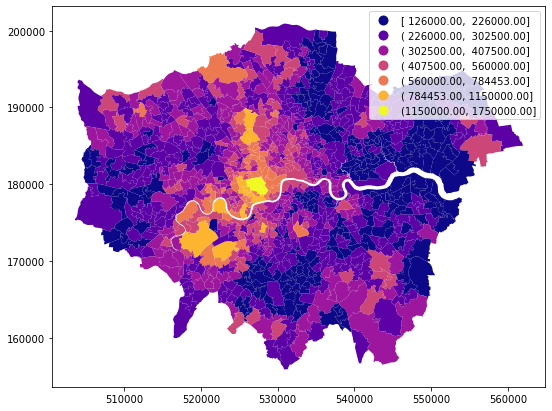

In [34]:
gdf.plot(column= 'Median - 2011',cmap='plasma',
        scheme='FisherJenks',k=7,edgecolor='None',legend=True,figsize=(9,7));

In [35]:
gdf.to_file(os.path.join('data','raw','MSOA_Atlas.gpkg'),driver='GPKG')
print('Done')

Done


In [32]:
gdf = gpd.read_file(os.path.join('data','raw','MSOA_Atlas.gpkg'),driver='GPKG')
print(gdf.shape)

(983, 83)


In [38]:
categoricals = ['Borough','Subregion']
for c in categoricals:
    gdf[c] = gdf[c].astype('category')

In [39]:
from sklearn.model_selection import train_test_split
pdf = gdf['Median - 2011'].copy()
df_train,df_test,pr_train,pr_test = train_test_split(gdf,pdf,test_size=0.2,random_state=44)

In [40]:
pdf

0      465000.0
1      185000.0
2      200000.0
3      193750.0
4      165000.0
         ...   
978    280000.0
979    297500.0
980    297250.0
981    384000.0
982    450000.0
Name: Median - 2011, Length: 983, dtype: float64

In [41]:
gdf

,OBJECTID,BNG_E,BNG_N,msoa11hclnm,MSOA Code,MSOA Name,Age - All Ages,Age - 0-15,Age - 16-29,Age - 30-44,...,Vehicles - No cars or vans in hh,Vehicles - 1 car or van in hh,Vehicles - 2 cars or vans in hh,Vehicles - 3 cars or vans in hh,Vehicles - 4 or more cars or vans in hh,Vehicles - Sum of all cars or vans in the area,Vehicles - Cars per hh,Borough,Subregion,geometry
0,1,532384,181355,City of London,E02000001,City of London 001,7375.0,620.0,1665.0,2045.0,...,3043.0,1100.0,173.0,51.0,18.0,1692.0,0.385861,City of London,Inner West,"POLYGON ((532135.138 182198.131, 532158.250 18..."
1,2,548267,189685,Marks Gate,E02000002,Barking and Dagenham 001,6775.0,1751.0,1277.0,1388.0,...,1020.0,1186.0,424.0,66.0,17.0,2305.0,0.849613,Barking and Dagenham,Outer East and North East,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,3,548259,188520,Chadwell Heath East,E02000003,Barking and Dagenham 002,10045.0,2247.0,1959.0,2300.0,...,1196.0,1753.0,691.0,155.0,39.0,3766.0,0.982264,Barking and Dagenham,Outer East and North East,"POLYGON ((549102.438 189324.625, 548954.517 18..."
3,4,551004,186412,Eastbrookend,E02000004,Barking and Dagenham 003,6182.0,1196.0,1277.0,1154.0,...,556.0,1085.0,515.0,128.0,34.0,2650.0,1.143227,Barking and Dagenham,Outer East and North East,"POLYGON ((551550.056 187364.705, 551478.000 18..."
4,5,548733,186824,Becontree Heath,E02000005,Barking and Dagenham 004,8562.0,2200.0,1592.0,1995.0,...,1080.0,1423.0,551.0,109.0,20.0,2937.0,0.922714,Barking and Dagenham,Outer East and North East,"POLYGON ((549099.634 187656.076, 549161.375 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,6784,540765,175168,Kidbrooke South,E02006927,Greenwich 034,8315.0,1749.0,1391.0,1910.0,...,1095.0,1545.0,529.0,136.0,33.0,3159.0,0.946375,Greenwich,Outer East and North East,"POLYGON ((541029.881 176265.023, 541101.997 17..."
979,6785,537902,177443,Greenwich & Deptford Creekside,E02006928,Greenwich 035,7341.0,1249.0,2747.0,2142.0,...,1724.0,1084.0,144.0,20.0,5.0,1456.0,0.489083,Greenwich,Outer East and North East,"MULTIPOLYGON (((538300.370 177956.634, 538290...."
980,6786,540015,179091,Greenwich Peninsula,E02006929,Greenwich 036,7490.0,1384.0,1992.0,2298.0,...,1769.0,1330.0,200.0,24.0,10.0,1880.0,0.564056,Greenwich,Outer East and North East,"POLYGON ((540054.362 179353.134, 540220.354 17..."
981,6787,540126,178333,Greenwich East,E02006930,Greenwich 037,6561.0,994.0,1691.0,2138.0,...,1261.0,1331.0,255.0,23.0,6.0,1943.0,0.675591,Greenwich,Outer East and North East,"POLYGON ((539552.478 178604.042, 539533.000 17..."


In [43]:
print(f'Original data size: {gdf.shape[0]:,} x {gdf.shape[1]}')

Original data size: 983 x 83


In [44]:
print(f'Training data size: {df_train.shape[0]:,} x {df_train.shape[1]}')

Training data size: 786 x 83


In [45]:
print(f'Testing data size: {df_test.shape[0]:,} x {df_test.shape[1]}')

Testing data size: 197 x 83


In [46]:
print(','.join([str(x)for x in df_train.index[:10]]))
print(','.join([str(x)for x in pr_train.index[:10]]))

810,502,471,74,415,316,15,37,877,449
810,502,471,74,415,316,15,37,877,449


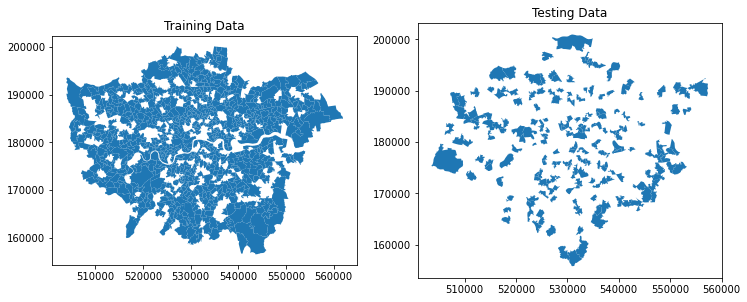

In [48]:
f,axes = plt.subplots(1,2,figsize=(12,5))
df_train.plot(ax=axes[0])
df_test.plot(ax=axes[1])
axes[0].set_title('Training Data')
axes[1].set_title('Testing Data');

In [49]:
kwds = dict(s=7,alpha=0.95,edgecolor='none')
ho = ['Inner East','Inner West','Outer West and North West','Outer South','Outer East and North East']

In [52]:
cols = ['Tenure - Owned outright', 'Tenure - Owned with a mortgage or loan',
        'Tenure - Social rented', 'Tenure - Private rented']

In [53]:
from sklearn.preprocessing import MinMaxScaler
scalers = [MinMaxScaler().fit(df_train[x].values.reshape(-1,1))for x in cols]

In [60]:
scalers

[MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()]

In [63]:
tr_normed = df_train[cols+['Subregion']].copy()
tr_normed

,Tenure - Owned outright,Tenure - Owned with a mortgage or loan,Tenure - Social rented,Tenure - Private rented,Subregion
810,411.0,1031.0,1386.0,426.0,Outer South
502,766.0,959.0,868.0,577.0,Outer West and North West
471,1275.0,1225.0,399.0,238.0,Outer East and North East
74,979.0,1341.0,276.0,235.0,Outer East and North East
415,691.0,811.0,184.0,1407.0,Inner East
...,...,...,...,...,...
571,1024.0,470.0,181.0,1763.0,Inner West
173,612.0,437.0,916.0,861.0,Inner West
753,367.0,592.0,602.0,641.0,Outer East and North East
419,885.0,821.0,527.0,430.0,Outer West and North West


In [58]:
for i in range(0,len(cols)):
    tr_normed[cols[i]] = scalers[i].transform(df_train[cols[i]].values.reshape(-1,1))

In [61]:
tst_normed = df_test[cols+['Subregion']].copy()
for i in range(0,len(cols)):
     tst_normed[cols[i]] = scalers[i].transform(df_test[cols[i]].values.reshape(-1,1))

In [62]:
tst_normed

,Tenure - Owned outright,Tenure - Owned with a mortgage or loan,Tenure - Social rented,Tenure - Private rented,Subregion
490,0.425854,0.539948,0.126279,0.179878,Outer West and North West
356,0.100000,0.240209,0.713875,0.852134,Inner East
64,0.209268,0.355091,0.604220,0.148247,Outer East and North East
283,0.451707,0.538381,0.196292,0.386433,Outer East and North East
830,0.575122,0.533681,0.021739,0.051829,Outer South
...,...,...,...,...,...
204,0.579024,0.700783,0.058504,0.069741,Outer South
800,0.210732,0.436031,0.400575,0.325838,Inner East
284,0.485854,0.698695,0.088235,0.216082,Outer East and North East
23,0.474634,0.547258,0.158248,0.255335,Outer West and North West


In [64]:
tr_normed.columns = [re.sub(' (- |/)','\n',x)for x in tr_normed.columns.values]
tst_normed.columns = [re.sub('(- |/)','\n',x)for x in tst_normed.columns.values]

In [65]:
df_train

,OBJECTID,BNG_E,BNG_N,msoa11hclnm,MSOA Code,MSOA Name,Age - All Ages,Age - 0-15,Age - 16-29,Age - 30-44,...,Vehicles - No cars or vans in hh,Vehicles - 1 car or van in hh,Vehicles - 2 cars or vans in hh,Vehicles - 3 cars or vans in hh,Vehicles - 4 or more cars or vans in hh,Vehicles - Sum of all cars or vans in the area,Vehicles - Cars per hh,Borough,Subregion,geometry
810,811,526593,166350,St Helier South,E02000841,Sutton 002,8721.0,2091.0,1717.0,2139.0,...,1143.0,1455.0,604.0,104.0,29.0,3106.0,0.931334,Sutton,Outer South,"POLYGON ((526809.139 166761.960, 526815.439 16..."
502,503,505964,179497,West Drayton West,E02000522,Hillingdon 029,8653.0,2066.0,1718.0,2018.0,...,914.0,1458.0,676.0,159.0,62.0,3568.0,1.091465,Hillingdon,Outer West and North West,"POLYGON ((506593.744 179659.813, 506597.900 17..."
471,472,552416,183987,South Hornchurch,E02000490,Havering 027,7828.0,1461.0,1298.0,1402.0,...,770.0,1421.0,732.0,183.0,63.0,3711.0,1.171032,Havering,Outer East and North East,"POLYGON ((552515.899 185240.007, 552367.005 18..."
74,75,547045,176511,St Michael's,E02000077,Bexley 013,7823.0,1634.0,1346.0,1587.0,...,563.0,1319.0,739.0,191.0,58.0,3614.0,1.259233,Bexley,Outer East and North East,"POLYGON ((547454.208 176918.500, 547453.337 17..."
415,416,528891,187694,Highgate East,E02000431,Haringey 035,6685.0,912.0,1538.0,2363.0,...,1408.0,1368.0,297.0,46.0,14.0,2160.0,0.689435,Haringey,Inner East,"POLYGON ((528473.863 188166.973, 528664.000 18..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,572,526496,178573,South Kensington,E02000592,Kensington and Chelsea 016,6761.0,973.0,1441.0,2211.0,...,1893.0,1307.0,308.0,44.0,31.0,2223.0,0.620430,Kensington and Chelsea,Inner West,"POLYGON ((526726.000 178865.000, 526733.881 17..."
173,174,527487,184527,Adelaide Road,E02000179,Camden 014,6329.0,1319.0,1247.0,1779.0,...,1493.0,1104.0,214.0,43.0,16.0,1735.0,0.604530,Camden,Inner West,"POLYGON ((527556.966 184912.235, 527651.275 18..."
753,754,544287,185218,Loxford Park,E02000783,Redbridge 033,7255.0,2222.0,1599.0,1726.0,...,966.0,954.0,266.0,52.0,12.0,1696.0,0.753778,Redbridge,Outer East and North East,"POLYGON ((544303.435 185657.793, 544331.167 18..."
419,420,516341,191582,Stanmore Uxbridge Road,E02000435,Harrow 003,7426.0,1408.0,1304.0,1561.0,...,516.0,1108.0,832.0,205.0,67.0,3674.0,1.346774,Harrow,Outer West and North West,"POLYGON ((516106.314 192412.556, 516179.460 19..."


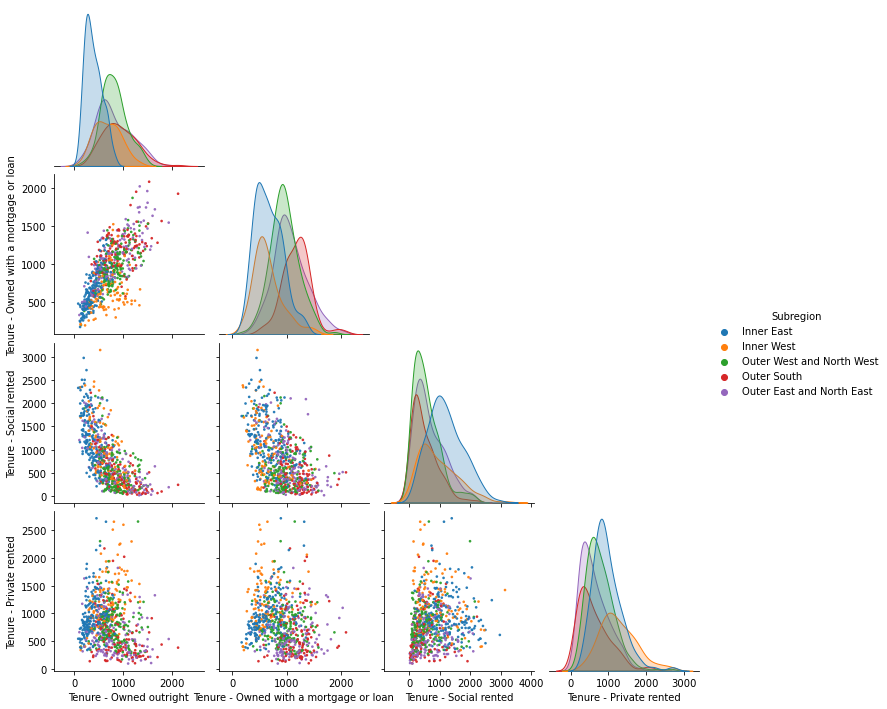

In [66]:
sns.pairplot(data=df_train[cols+['Subregion']],hue='Subregion',diag_kind='kde',corner=True,plot_kws=kwds,hue_order=ho)

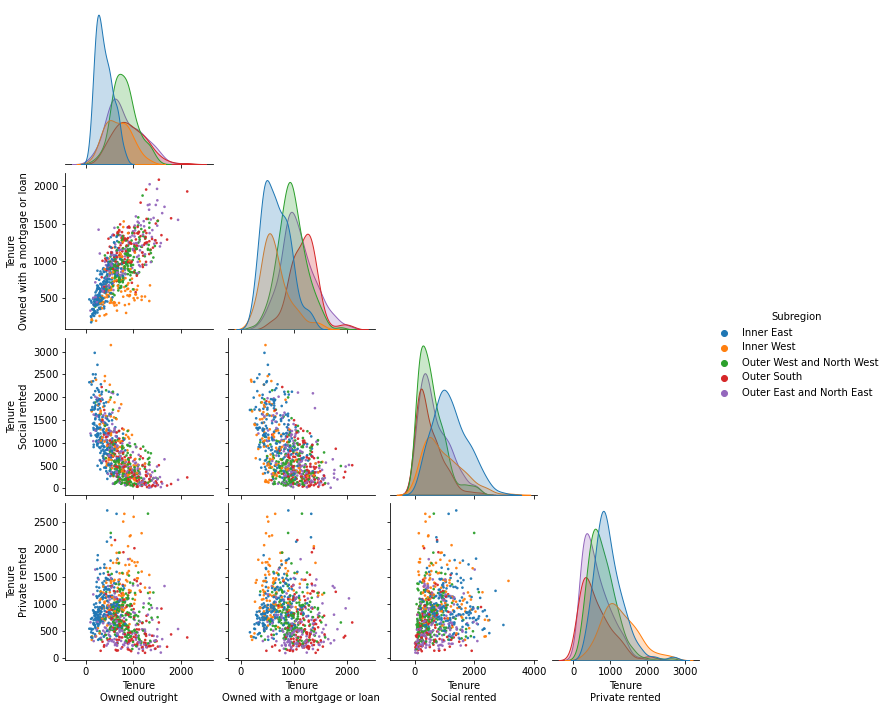

In [67]:
sns.pairplot(data=tr_normed,hue='Subregion',diag_kind='kde',corner=True,plot_kws=kwds,hue_order=ho);

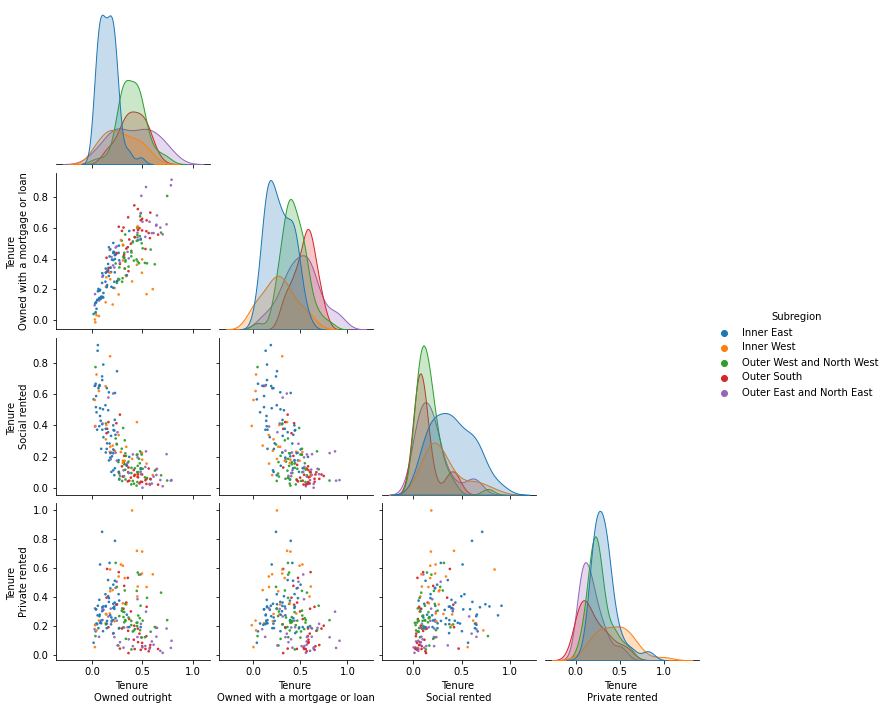

In [68]:
sns.pairplot(data=tst_normed, hue='Subregion', diag_kind='kde', corner=True, plot_kws=kwds, hue_order=ho);

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [71]:
col = 'Vehicles - No cars or vans in hh'
tr = df_train[[col]].copy()
tst = df_test[[col]].copy()

In [72]:
ss = StandardScaler()

In [73]:
ss.fit(tr[col].values.reshape(-1,1))
tr[f'Z. {col}'] = ss.transform(tr[col].values.reshape(-1,1))
tst[f'Z. {col}'] = ss.transform(tst[col].values.reshape(-1,1))

In [77]:
rs = RobustScaler(quantile_range=(25.0,75.0))
rs.fit(tr[col].values.reshape(-1,1))
tr[f'IQR. {col}'] = rs.transform(tr[col].values.reshape(-1,1))
tst[f'IQR. {col}'] = rs.transform(tst[col].values.reshape(-1,1))

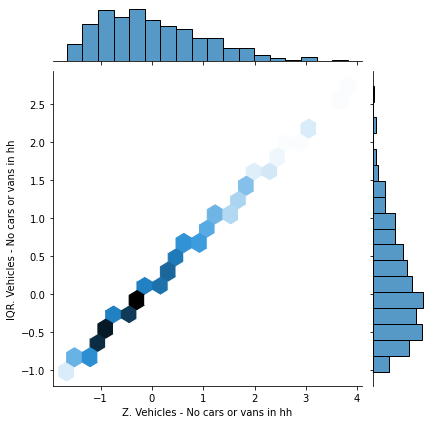

In [80]:
sns.jointplot(data=tr,x=f'Z. {col}', y=f'IQR. {col}',kind='hex');

Text(0.5, 0, 'Standardised Value for No cars or vans in hh')

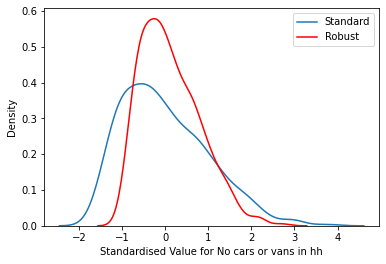

In [84]:
ax = sns.kdeplot(tr[f'Z. {col}'])
sns.kdeplot(tr[f'IQR. {col}'],color='r',ax=ax)
plt.legend(loc='upper right', labels=['Standard', 'Robust'])
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Standardised Value for No cars or vans in hh')

In [ ]:
Task5